The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. 

 Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python

In [1]:
import numpy as np

a = np.array([1,2,3])
b = np.array([2,2,2])

a*b

array([2, 4, 6])

In [2]:
a = np.array([1,2,3])
b = 2
a*b

array([2, 4, 6])

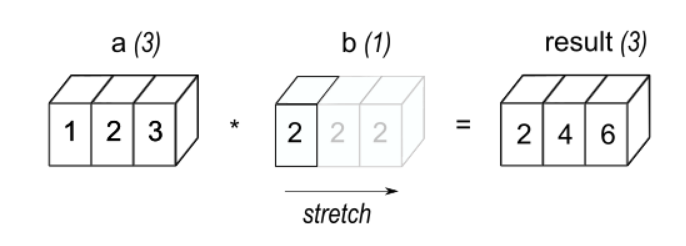

In the simplest example of broadcasting, the scalar b is stretched to become an array of same shape as a so the shapes are compatible for element-by-element multiplication.

#### General Broadcasting Rules

1. Array must be equal OR

2. One of them is 1. 

For example, if you have a 256x256x3 array of RGB values, and you want to scale each color in the image by a different value, you can multiply the image by a one-dimensional array with 3 values.

Image  (3d array): 256 x 256 x 3

Scale  (1d array):             3

Result (3d array): 256 x 256 x 3

In the following example, both the A and B arrays have axes with length one that are expanded to a larger size during the broadcast operation:

A      (4d array):  8 x 1 x 6 x 1

B      (3d array):      7 x 1 x 5

Result (4d array):  8 x 7 x 6 x 5

In [5]:
# An example of broadcasting when a 1-d array is added to a 2-d array:

a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])

b = np.array([1.0, 2.0, 3.0])
a + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

In [6]:
b = np.array([1.0, 2.0, 3.0, 4.0])
a + b

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

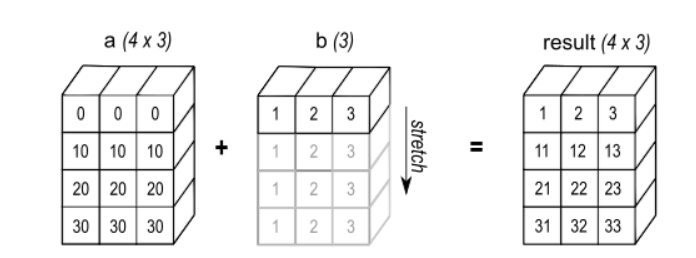

A one dimensional array added to a two dimensional array results in broadcasting if number of 1-d array elements matches the number of 2-d array columns.

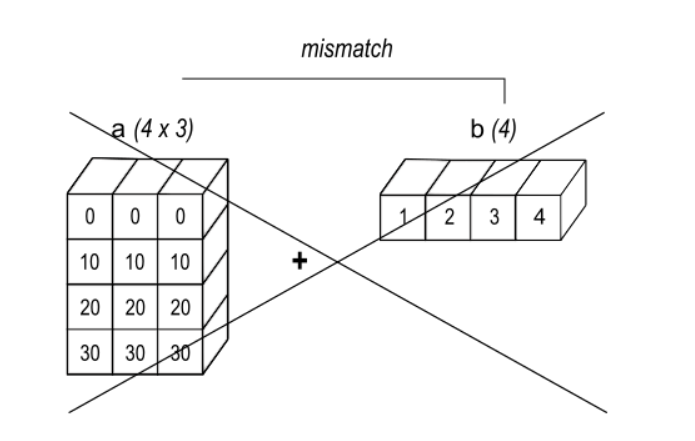

When the trailing dimensions of the arrays are unequal, broadcasting fails because it is impossible to align the values in the rows of the 1st array with the elements of the 2nd arrays for element-by-element addition.

#### A Practical Example: Vector Quantization


In [7]:
from numpy import array, argmin, sqrt, sum
observation = array([111.0, 188.0])
codes = array([[102.0, 203.0],
               [132.0, 193.0],
               [45.0, 155.0],
               [57.0, 173.0]])
diff = codes - observation    # the broadcast happens here
dist = sqrt(sum(diff**2,axis=-1))
argmin(dist)

0

In this example, the observation array is stretched to match the shape of the codes array:

Observation      (1d array):      2

Codes            (2d array):  4 x 2

Diff             (2d array):  4 x 2


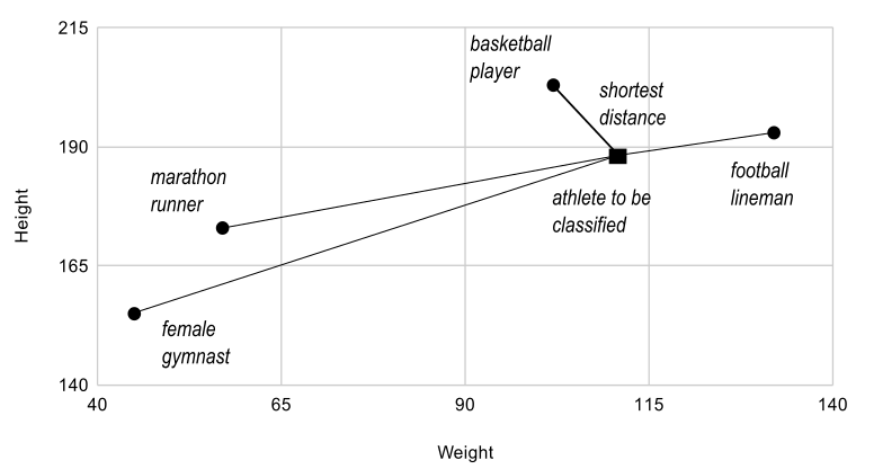

The basic operation of vector quantization calculates the distance between an object to be classified, the dark square, and multiple known codes, the gray circles. In this simple case, the codes represent individual classes. More complex cases use multiple codes per class.